In [41]:
# Required python package imports
import sqlalchemy
import sys
import seaborn as sns
from sqlalchemy import create_engine, MetaData, Table, select
import pyodbc
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time 
import multiprocessing 
%matplotlib inline
import matplotlib.image as image
import datetime
from yahoo_finance import Share

In [83]:
#tickers_ls = ['YHOO','IBM','MSFT']
tickers_ls = ['SPY','IWM','TLT','IYR','EEM','XLU','GLD','IBB','SHY']
px_data=pd.DataFrame() #create dataframe
for ticker in tickers_ls:
    print (ticker, end="", flush=True),
    px_data_raw=pd.DataFrame(Share(ticker).get_historical('2015-09-21', '2016-09-21'))
    if len(px_data_raw)!=0:
        px_data=px_data.append(px_data_raw)
    px_data=px_data.reindex()

SPYIWMTLTIYREEMXLUGLDIBBSHY

In [84]:
px_data['Adj_Close']=px_data.Adj_Close.astype(float)
px_data=px_data.sort_values(by=['Symbol','Date'])
px_data['ret']=px_data.groupby('Symbol')['Adj_Close'].pct_change().fillna(0)
px_data['ret_tr']=px_data.ret+1
#x_data=px_data[px_data['ret'].notnull()]
px_data=px_data.join(tickers_tb, on='Symbol')
px_data.head(3)

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,ret,ret_tr,Ticker,Name
253,32.992584,33.77,2015-09-21,33.91,33.639999,33.84,EEM,45318300,0.000000,1.000000,NaN,NaN
252,32.377086,33.139999,2015-09-22,33.169998,32.880001,33.040001,EEM,58874100,-0.018656,0.981344,NaN,NaN
251,31.869056,32.619999,2015-09-23,33.029999,32.599998,32.990002,EEM,44721000,-0.015691,0.984309,NaN,NaN


## Plot Data

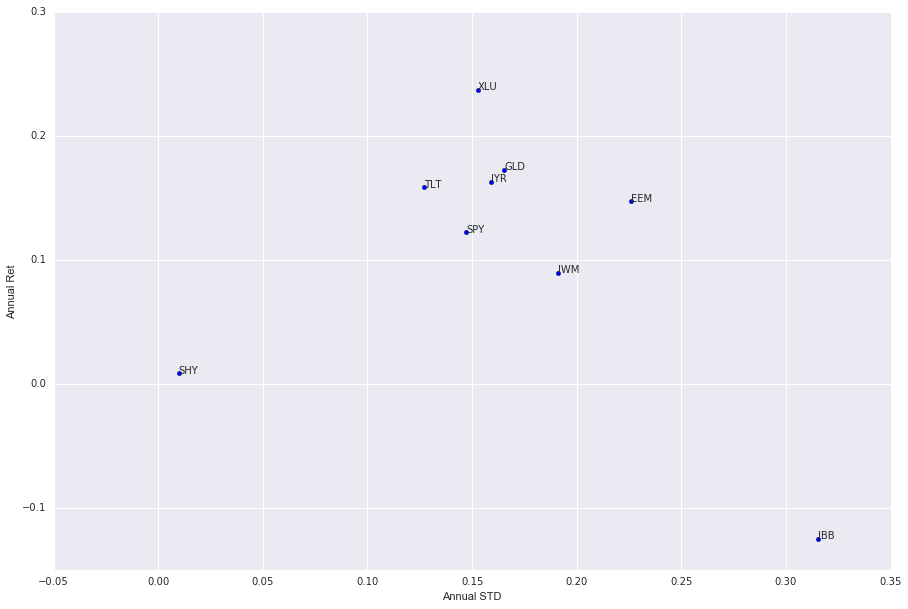

In [85]:
#summary calculations
ret_1yr=px_data.groupby('Symbol')['ret_tr'].prod()-1
std_1yr=px_data.groupby('Symbol')['ret'].std()*(255**0.5)
n=std_1yr.index
plt.figure(figsize=(15,10))
plt.scatter(std_1yr, ret_1yr)#, marker=ret_1yr['Symbol'])
for i, txt in enumerate(n):
    plt.annotate(txt, (std_1yr[i],ret_1yr[i]))
plt.xlabel('Annual STD')
plt.ylabel('Annual Ret')